# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/coneychiwabee/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Read your api key environment variable.

api_key= os.getenv("NEWS_API_KEY")


# Confirm retrieval of api key
#api_key

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)


In [5]:
# Fetch the Bitcoin news articles.
btc_articles = newsapi.get_everything(q="Bitcoin", language="en")
#btc_articles

In [6]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q="Ethereum", language="en")
#eth_articles

In [7]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        date = article["publishedAt"][:10]
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822
1,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705
2,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857
3,2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873
4,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836


In [8]:
# Create the Ethereum sentiment scores DataFrame
eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        date = article["publishedAt"][:10]
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()

,date,text,compound,positive,negative,neutral
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925
1,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939
2,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836
3,2021-08-03,Representations of cryptocurrencies Bitcoin an...,0.0000,0.000,0.000,1.000
4,2021-07-27,Cryptocurrencies spiked Monday after Amazon li...,0.3400,0.105,0.000,0.895


In [9]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.008310,0.060000,0.059750,0.880250
std,0.493498,0.060037,0.090311,0.101662
min,-0.827100,0.000000,0.000000,0.653000
25%,-0.405525,0.000000,0.000000,0.836000
50%,0.000000,0.056000,0.000000,0.891000
75%,0.445000,0.096000,0.088250,0.940000
max,0.726400,0.178000,0.287000,1.000000


In [10]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.209565,0.063750,0.01345,0.922800
std,0.331383,0.075861,0.02766,0.081637
min,-0.340000,0.000000,0.00000,0.782000
25%,0.000000,0.000000,0.00000,0.842750
50%,0.000000,0.000000,0.00000,0.933500
75%,0.528675,0.149250,0.00000,1.000000
max,0.771700,0.194000,0.07200,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: ETH (BTC - on first submission)

Q: Which coin had the highest compound score?

A: ETH (BTC - on first submission)

Q. Which coin had the highest positive score?

A: ETH (BTC - on first submission)

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.corpus import reuters
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
stopwords_list = {'bitcoin', 'ethereum','the', 'for', 'the', 'a', 'this','that', 'of', 'in', 'for', 'on', 'to', 'and', 'it', 'is', 'are', 'by','char','ha'}

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [13]:
#print(reuters.categories())

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    #TODO
    # Remove the punctuation from text
    stopwords_set = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z0-9 ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words - OK
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words - OK
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase + # Remove the stop words - OK
    tokens = [word.lower() for word in lem if word.lower() not in stopwords_list.union(stopwords_list)]
   
    
    return tokens

In [15]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = btc_df['text'].apply(tokenizer)
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-19,"Like Dogecoin devotees, the mayor of Reno, and...",0.6908,0.178,0.000,0.822,"[like, dogecoin, devotee, mayor, reno, leader,..."
1,2021-07-05,Filed under:\r\nThe supply chain attack has re...,-0.5719,0.111,0.184,0.705,"[filed, underthe, supply, chain, attack, reach..."
2,2021-07-05,image copyrightGetty Images\r\nThe gang behind...,-0.6124,0.000,0.143,0.857,"[image, copyrightgetty, imagesthe, gang, behin..."
3,2021-07-23,To get a roundup of TechCrunchs biggest and mo...,0.6240,0.127,0.000,0.873,"[get, roundup, techcrunchs, biggest, most, imp..."
4,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[while, retail, investor, grew, more, comforta..."


In [16]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = eth_df['text'].apply(tokenizer)
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-07-16,There are many blockchain platforms competing ...,0.3612,0.075,0.000,0.925,"[there, many, blockchain, platform, competing,..."
1,2021-07-29,Blockchain infrastructure startups are heating...,-0.2411,0.000,0.061,0.939,"[blockchain, infrastructure, startup, heating,..."
2,2021-07-14,While retail investors grew more comfortable b...,0.7264,0.164,0.000,0.836,"[while, retail, investor, grew, more, comforta..."
3,2021-08-03,Representations of cryptocurrencies Bitcoin an...,0.0000,0.000,0.000,1.000,"[representations, cryptocurrencies, placed, pc..."
4,2021-07-27,Cryptocurrencies spiked Monday after Amazon li...,0.3400,0.105,0.000,0.895,"[cryptocurrencies, spiked, monday, after, amaz..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
def get_tokens(df):
    tokens = []
    for token in df['tokens']:
        tokens.extend(token)
    return tokens

btc_tokens = get_tokens(btc_df)
eth_tokens = get_tokens(eth_df)

def bigram_counter(tokens, N=2): 
    words_count = dict(Counter(ngrams(tokens, n=N)))
    return words_count

In [19]:
# Generate the Bitcoin N-grams where N=2
btc_bigram = bigram_counter(btc_tokens, 2)

In [20]:
# Generate the Ethereum N-grams where N=2
etc_bigram = bigram_counter(eth_tokens, 2)

In [21]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [22]:
# Use token_count to get the top 10 words for Bitcoin
btc_top_10_words = token_count(btc_tokens)
btc_top_10_words

[('attack', 7),
 ('reuters', 6),
 ('reutersdado', 6),
 ('july', 5),
 ('2021', 5),
 ('world', 5),
 ('illustration', 5),
 ('taken', 5),
 ('ransomware', 4),
 ('seen', 4)]

In [23]:
# Use token_count to get the top 10 words for Ethereum
eth_top_10_words = token_count(eth_tokens)
eth_top_10_words

[('2021', 8),
 ('from', 6),
 ('cryptocurrencies', 6),
 ('cryptocurrency', 6),
 ('illustration', 5),
 ('taken', 5),
 ('platform', 4),
 ('now', 4),
 ('more', 4),
 ('representations', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

Text(0.5, 1.0, 'Bitcoin Word Cloud')

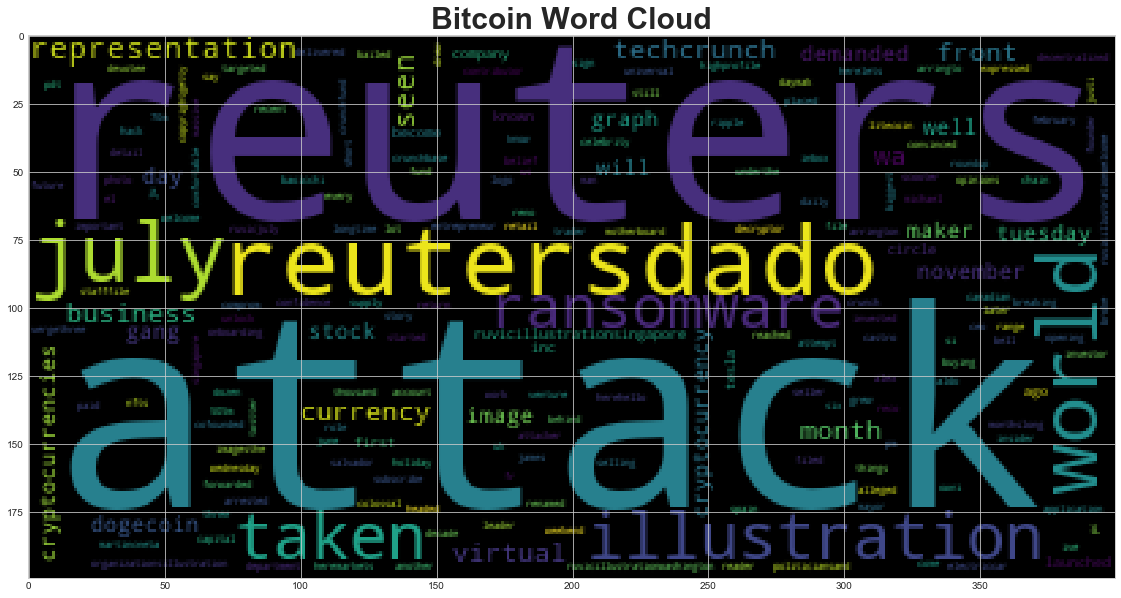

In [25]:
# Generate the Bitcoin word cloud

wordcloud = WordCloud(collocations=False).generate(' '.join(btc_tokens))
plt.imshow(wordcloud)
plt.title(label='Bitcoin Word Cloud', fontdict={'fontsize': 30, 'fontweight':'bold'})

Text(0.5, 1.0, 'Ethereum Word Cloud')

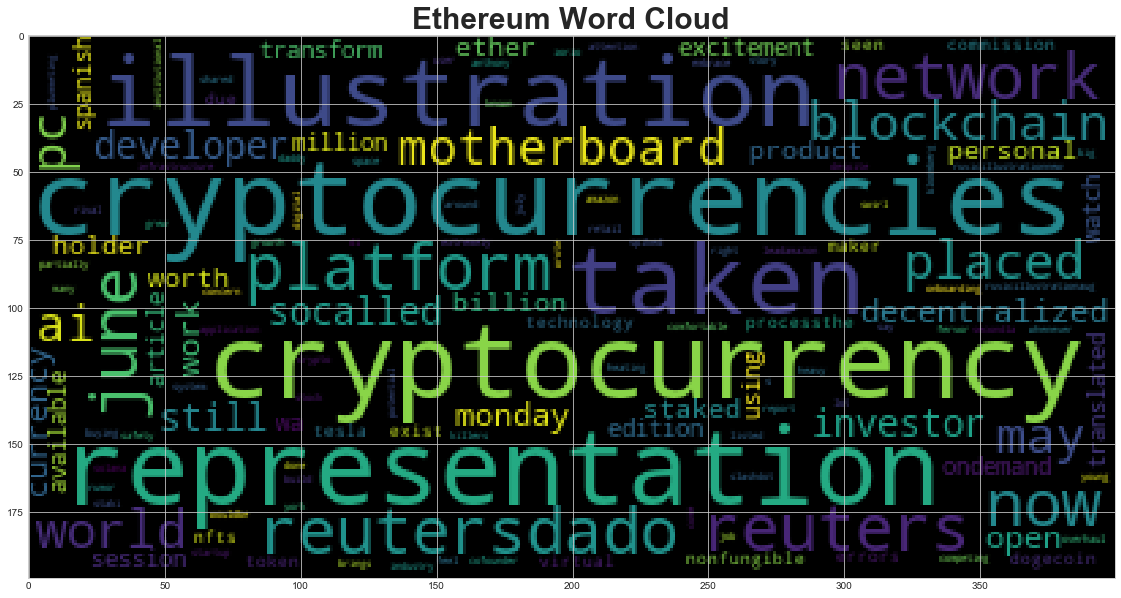

In [26]:
# Generate the Ethereum word cloud
wordcloud = WordCloud(collocations=False).generate(' '.join(eth_tokens))
plt.imshow(wordcloud)
plt.title(label='Ethereum Word Cloud', fontdict={'fontsize': 30, 'fontweight':'bold'})

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [27]:
import spacy
from spacy import displacy

In [28]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [29]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [30]:
# Concatenate all of the Bitcoin text together
btc_content = ' '.join(btc_df['text'])

In [31]:
# Run the NER processor on all of the text
text = nlp(btc_content)


# Add a title to the document
text.user_data["title"] = "Bitcoin NER"

In [32]:
# Render the visualization
displacy.render(text, style="ent")

In [33]:
# List all Entities
from pprint import pprint
pprint([(X.text, X.label_) for X in text.ents])

[('Dogecoin', 'PERSON'),
 ('Reno', 'PERSON'),
 ('El Salvador', 'GPE'),
 ('Aldo Baoicchi', 'GPE'),
 ('Canadian', 'NORP'),
 ('Daymak', 'ORG'),
 ('Alex Castro', 'PERSON'),
 ('Verge', 'ORG'),
 ('Three days', 'DATE'),
 ('the holiday weekend', 'DATE'),
 ('$70m', 'MONEY'),
 ('£50.5m', 'MONEY'),
 ('Bitcoin', 'PERSON'),
 ('3 p.m. PDT', 'TIME'),
 ('Daily Crunch', 'WORK_OF_ART'),
 ('July 23, 2021', 'DATE'),
 ('Bitcoin and Ethereum', 'ORG'),
 ('2021', 'DATE'),
 ('TechCrunch', 'ORG'),
 ('Michael Arrington', 'PERSON'),
 ('Crunchbase', 'ORG'),
 ('CrunchFund', 'ORG'),
 ('Tuesday', 'DATE'),
 ('2017', 'DATE'),
 ('SINGAPORE', 'GPE'),
 ('July 28', 'DATE'),
 ('Reuters', 'ORG'),
 ('40,000', 'MONEY'),
 ('Wednesday', 'DATE'),
 ('James Martin', 'PERSON'),
 ('CNET', 'ORG'),
 ('UK', 'GPE'),
 ('Spain', 'GPE'),
 ('Twitter', 'PRODUCT'),
 ('2020', 'DATE'),
 ('the US Department of Justi', 'ORG'),
 ('November 19, 2020', 'DATE'),
 ('Dado Ruvic/IllustrationSINGAPORE', 'PERSON'),
 ('July 21', 'DATE'),
 ('Reuters', 'ORG')

---

### Ethereum NER

In [34]:
# Concatenate all of the Ethereum text together
eth_content = ' '.join(eth_df['text'])

In [35]:
# Run the NER processor on all of the text
text = nlp(eth_content)


# Add a title to the document
text.user_data["title"] = "Ethereum NER"

In [36]:
# Render the visualization
displacy.render(text, style="ent")

In [37]:
# List all Entities
from pprint import pprint
pprint([(X.text, X.label_) for X in text.ents])

[('Ethereum', 'ORG'),
 ('Ethereum Killers', 'WORK_OF_ART'),
 ('Solana', 'PERSON'),
 ('Bitcoin and Ethereum', 'ORG'),
 ('2021', 'DATE'),
 ('Bitcoin and Ethereum', 'ORG'),
 ('June 29, 2021', 'DATE'),
 ('Dado Ruvic/IllustrationAug 3', 'PERSON'),
 ('Reuters', 'ORG'),
 ('Cryptocurrencies', 'ORG'),
 ('Monday', 'DATE'),
 ('Amazon', 'ORG'),
 ('Amazon', 'ORG'),
 ('Anthony Di Iorio', 'PERSON'),
 ('Ethereum', 'ORG'),
 ('Bloomberg', 'PERSON'),
 ('Slashdot', 'ORG'),
 ('Ethereum', 'ORG'),
 ('June 29, 2021', 'DATE'),
 ('Dado Ruvic', 'PERSON'),
 ('IllustrationNEW YORK', 'GPE'),
 ('July 30', 'DATE'),
 ('Reuters', 'ORG'),
 ('second', 'ORDINAL'),
 ('more than $13 billion', 'MONEY'),
 ('2.0', 'CARDINAL'),
 ('Photothek/Getty Images', 'PERSON'),
 ('more than $13 billion', 'MONEY'),
 ('2.0', 'CARDINAL'),
 ('Livepeer', 'PRODUCT'),
 ('$20 million', 'MONEY'),
 ('Ethereum', 'ORG'),
 ('Spanish', 'NORP'),
 ('AI', 'ORG'),
 ('Xoy Capital', 'ORG'),
 ('Guadalajara', 'GPE'),
 ('Jalisco', 'GPE'),
 ('Xoycoin', 'PERSON'),

---